In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터 가져오기

df = pd.read_csv('./data/autompg.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,mpg,cyl,disp,hp,wt,accler,year,origin,carname
1,18,8,307,17,3504,12,70,1,chevrolet chevelle malibu
2,15,8,350,35,3693,11.5,70,1,buick skylark 320
3,18,8,318,29,3436,11,70,1,plymouth satellite
4,16,8,304,29,3433,12,70,1,amc rebel sst


In [4]:
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,mpg,cyl,disp,hp,wt,accler,year,origin,carname
1,18,8,307,17,3504,12,70,1,chevrolet chevelle malibu
2,15,8,350,35,3693,11.5,70,1,buick skylark 320
3,18,8,318,29,3436,11,70,1,plymouth satellite
4,16,8,304,29,3433,12,70,1,amc rebel sst


In [9]:
#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 10)
print(df.head())   
print('\n')

   mpg cylinders displacement horsepower weight acceleration model year  \
0  mpg       cyl         disp         hp     wt       accler       year   
1   18         8          307         17   3504           12         70   
2   15         8          350         35   3693         11.5         70   
3   18         8          318         29   3436           11         70   
4   16         8          304         29   3433           12         70   

   origin                       name  
0  origin                    carname  
1       1  chevrolet chevelle malibu  
2       1          buick skylark 320  
3       1         plymouth satellite  
4       1              amc rebel sst  




In [10]:
# 데이터 탐색

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mpg           399 non-null    object
 1   cylinders     399 non-null    object
 2   displacement  399 non-null    object
 3   horsepower    399 non-null    object
 4   weight        399 non-null    object
 5   acceleration  399 non-null    object
 6   model year    399 non-null    object
 7   origin        399 non-null    object
 8   name          399 non-null    object
dtypes: object(9)
memory usage: 28.2+ KB


In [14]:
df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
count,399,399,399,399,399,399,399,399,399
unique,130,6,83,95,352,96,14,4,306
top,13,4,97,29,1985,14.5,73,1,ford pinto
freq,20,204,21,22,4,23,40,249,6


In [16]:
df.horsepower.unique()

array(['hp', '17', '35', '29', '24', '42', '47', '46', '48', '40', '37',
       '34', '91', '93', '81', '84', '50', '83', '86', '10', '43', '45',
       '41', '1', '2', '5', '38', '31', '39', '8', '69', '82', '67', '72',
       '62', '66', '57', '76', '55', '44', '32', '9', '88', '26', '21',
       '33', '36', '90', '6', '49', '52', '71', '87', '14', '64', '79',
       '74', '53', '58', '89', '27', '16', '92', '68', '94', '11', '54',
       '77', '75', '13', '30', '3', '7', '65', '56', '28', '85', '60',
       '51', '63', '23', '4', '15', '19', '22', '20', '25', '73', '59',
       '18', '80', '61', '70', '12', '78'], dtype=object)

In [22]:
df.horsepower.replace(['?','hp'], np.nan, inplace=True) # 실수형 제외한 값 nan값으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df.horsepower = df.horsepower.astype('float') # 실수형으로 변경

In [23]:
df.mpg = df.mpg.astype('float') 
df.cylinders = df.cylinders.astype('int')
df.displacement = df.displacement.astype('float')
df.weight = df.weight.astype('float')
df['model year'] = df['model year'].astype('float')
df.origin = df.origin.astype('int')
print(type(df.horsepower))

<class 'pandas.core.series.Series'>


In [50]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
1,18.0,8,307.0,17.0,3504.0,12,70.0,1,chevrolet chevelle malibu
2,15.0,8,350.0,35.0,3693.0,11.5,70.0,1,buick skylark 320
3,18.0,8,318.0,29.0,3436.0,11,70.0,1,plymouth satellite
4,16.0,8,304.0,29.0,3433.0,12,70.0,1,amc rebel sst
5,17.0,8,302.0,24.0,3449.0,10.5,70.0,1,ford torino
...,...,...,...,...,...,...,...,...,...
394,27.0,4,140.0,82.0,2790.0,15.6,82.0,1,ford mustang gl
395,44.0,4,97.0,53.0,2130.0,24.6,82.0,2,vw pickup
396,32.0,4,135.0,80.0,2295.0,11.6,82.0,1,dodge rampage
397,28.0,4,120.0,75.0,2625.0,18.6,82.0,1,ford ranger


In [51]:
df.to_csv('./data/auto-mpg.csv', index=False)

In [25]:
# 데이터 분석

ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
1,18.0,8,17.0,3504.0
2,15.0,8,35.0,3693.0
3,18.0,8,29.0,3436.0
4,16.0,8,29.0,3433.0
5,17.0,8,24.0,3449.0


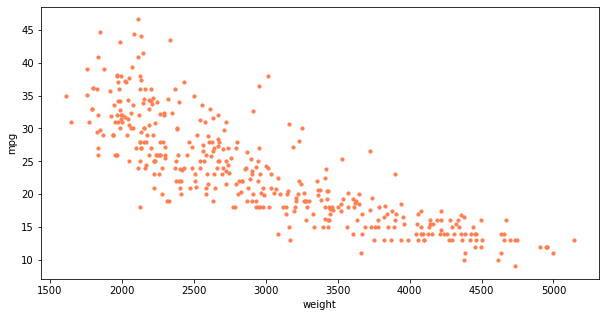

In [26]:
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5))
plt.show()
plt.close()

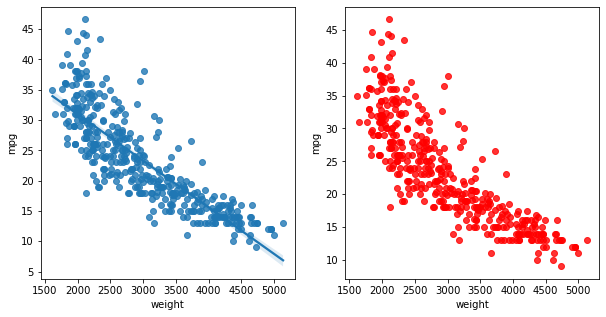

In [29]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)
sns.regplot(x='weight', y='mpg', color='r',data=ndf, ax=ax2, fit_reg=False)
plt.show()
plt.close()

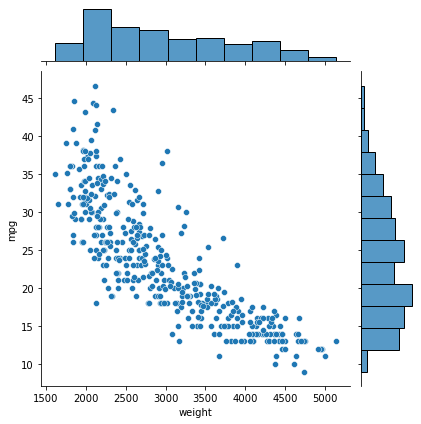

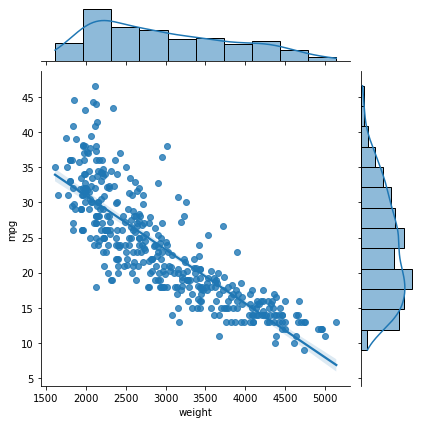

In [32]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf)
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)
plt.show()
plt.close()

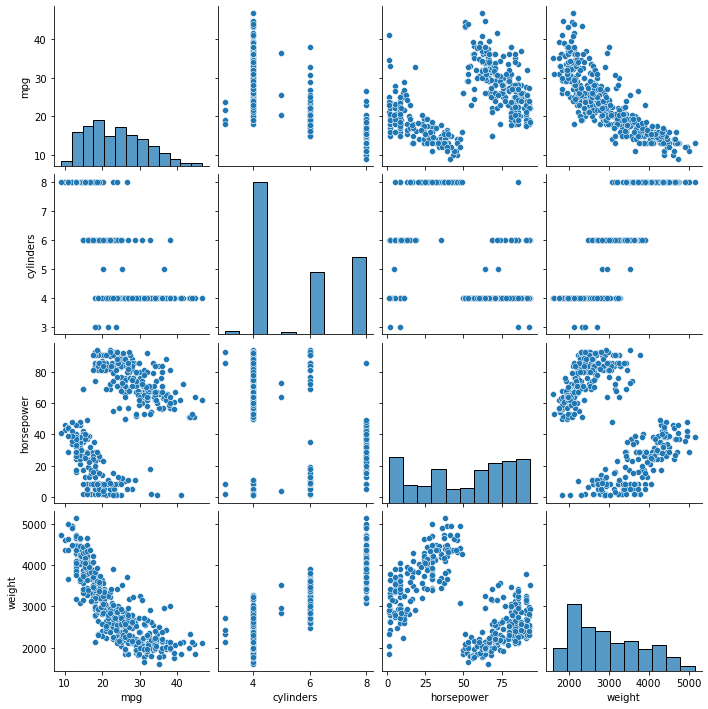

In [33]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
grid_ndf = sns.pairplot(ndf)
plt.show()
plt.close()

#### Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)

In [35]:
# 속성(변수) 선택

X = ndf[['weight']]
X

,weight
1,3504.0
2,3693.0
3,3436.0
4,3433.0
5,3449.0
...,...
394,2790.0
395,2130.0
396,2295.0
397,2625.0


In [38]:
print(type(X), X.shape)

<class 'pandas.core.frame.DataFrame'> (398, 1)


In [39]:
X = ndf[['weight']]  # 독립변수
y = ndf['mpg']  # 종속변수

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print(len(X_train), len(X_test))

278 120


#### Step 5: 단순회귀분석 모형 - sklearn 사용


In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)  # fit : 학습, train data로

LinearRegression()

In [43]:
# 성능평가(score) >> 결정계수(r-제곱: 설명력) 계산

r_2 = lr.score(X_test, y_test)
r_2

0.7243152426344306

In [44]:
lr.coef_ # 회귀식의 기울기

array([-0.00784408])

In [45]:
lr.intercept_ # 회귀식의 y절편

46.93728507432638

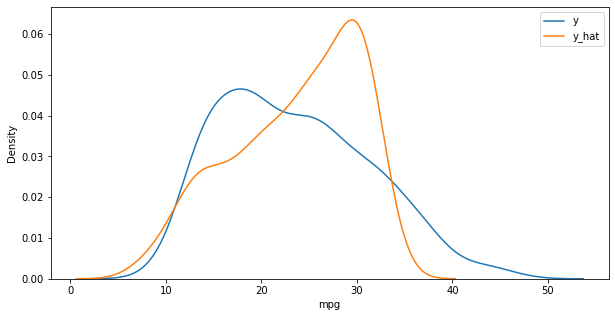

In [47]:
# 모형에 전체 X 데이터를 입력, 실제 값 y와 예측한 값 y_hat 비교
y_hat = lr.predict(X)

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y, label = 'y')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()